# Convolutional Neural Network
## Week-7 - 2023

**CIFAR dataset:**

The CIFAR dataset is a popular benchmark dataset in the field of computer vision and machine learning. It is a collection of labeled images used to train and test machine learning models, particularly for image classification tasks. The dataset is widely used because it represents a real-world problem and introduces several challenges that students should be aware of.

**Classification Problem:**

The classification problem of the CIFAR dataset is to correctly categorize images into predefined classes. For CIFAR-10, there are ten distinct classes, and for CIFAR-100, there are one hundred classes. Each image belongs to one of these classes, and the goal is to design a model that can accurately assign the correct class label to each image.





In [1]:
from tensorflow import keras

In [2]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

In [3]:
# Load the CIFAR-10 dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
print('X_train size: ',X_train.shape)
print('y_train size: ',y_train.shape)
print('X_test size:  ',X_test.shape)
print('y_test size:  ',y_test.shape)

X_train size:  (50000, 32, 32, 3)
y_train size:  (50000, 1)
X_test size:   (10000, 32, 32, 3)
y_test size:   (10000, 1)


In [5]:
# Class names in the CIFAR-10 dataset 

classes=['aircraft', 'car', 'bird', 'cat', 'deer',
 'dog', 'frog', 'hours', 'ship', 'truck']

classes

['aircraft',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'hours',
 'ship',
 'truck']

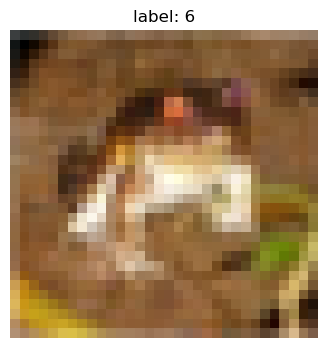

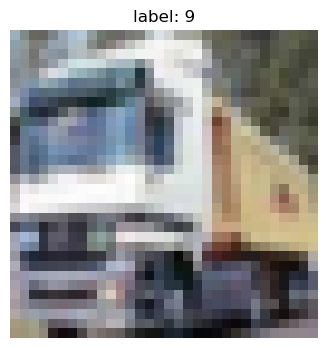

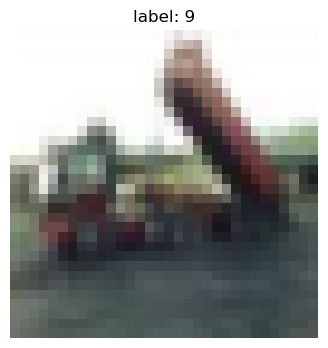

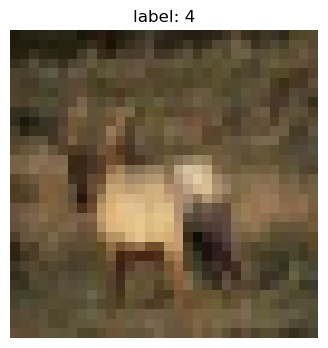

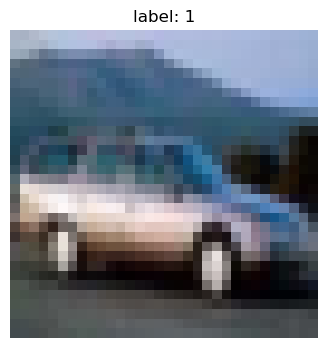

In [6]:
# Display a few images before model development, Hint - plt.title(f"Label: {y_train[i].argmax()}") will give you True Label.

#
# Your code to display a few images before the model development.
#

for i in range(5):
    plt.figure(figsize=(4, 4))
    plt.imshow(X_train[i])
    plt.title(f'label: {y_train[i][0]}')
    plt.axis('off')
    plt.show()

In [7]:
# Preprocess the data

X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

### MLP model

In [8]:
# Create an MLP model using Keras

mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))

# print the MLP model

print(mlp_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1707274 (6.51 MB)
Trainable params: 1707274 (6.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [9]:
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train and evaluate the MLP classifier

history = mlp_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 53s 32ms/step - loss: 1.8593 - accuracy: 0.3302
Epoch 2/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.6623 - accuracy: 0.4052
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5868 - accuracy: 0.4318
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.5334 - accuracy: 0.4529
Epoch 5/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.4981 - accuracy: 0.4633
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4657 - accuracy: 0.4753
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4449 - accuracy: 0.4831
Epoch 8/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4148 - accuracy: 0.4951
Epoch 9/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.3922 - accuracy: 0.5002
Epoch 10/10
1563/1563 [==============================] - 48s 31m

C:\Users\HP\AppData\Local\Temp\ipykernel_23720\256823875.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


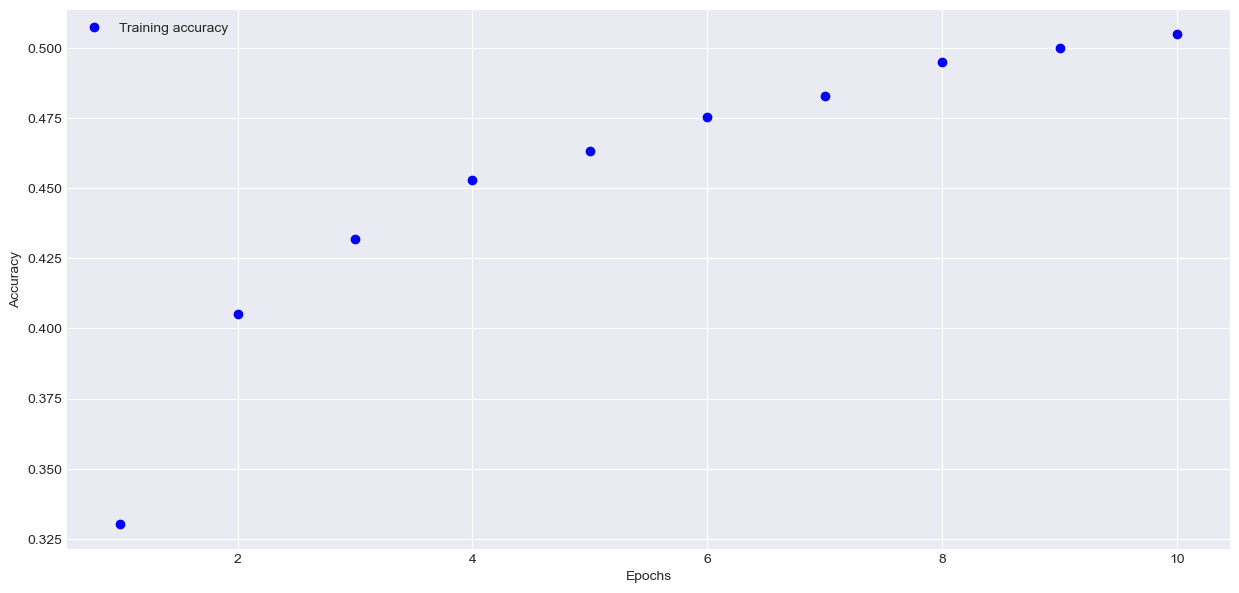

In [11]:
 # Print the training process graph and result 

history_dict = history.history
plt.style.use('seaborn-darkgrid') 

acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
# evaluation - Accuracy result on the Test set

mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

MLP Test Accuracy: 47.57%


### CNN model

In [13]:
# Create a CNN model using Keras

cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# print the CNN model

print(cnn_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [14]:
# compilation

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train and evaluate the CNN classifier

history2 = cnn_model.fit(X_train, y_train, epochs=10, verbose = 1)

Epoch 1/10
1563/1563 [==============================] - 56s 34ms/step - loss: 1.5269 - accuracy: 0.4429
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1732 - accuracy: 0.5849
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0091 - accuracy: 0.6453
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.9014 - accuracy: 0.6859
Epoch 5/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8293 - accuracy: 0.7107
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7626 - accuracy: 0.7331
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7151 - accuracy: 0.7503
Epoch 8/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.6701 - accuracy: 0.7664
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6263 - accuracy: 0.7801
Epoch 10/10
1563/1563 [==============================] - 57s 36m

C:\Users\HP\AppData\Local\Temp\ipykernel_23720\2127520356.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


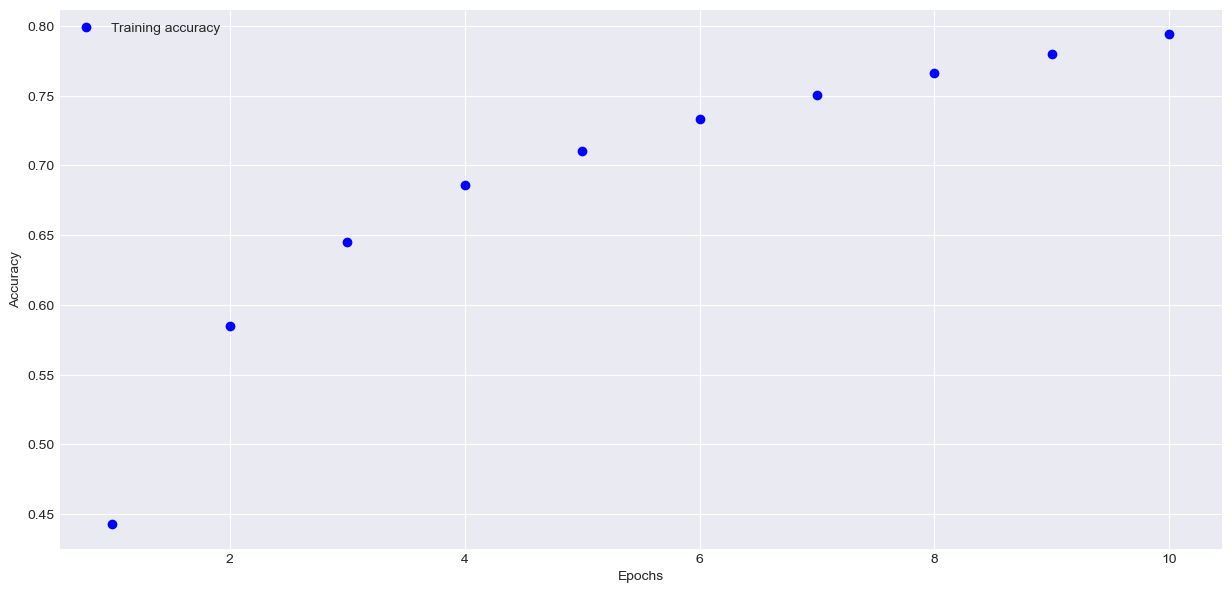

In [16]:
# Your code to print the CNN training process graph and result 
history_dict = history2.history
plt.style.use('seaborn-darkgrid') 

acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [17]:
# evaluation - Accuracy result on the Test set

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

CNN Test Accuracy: 71.15%


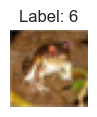

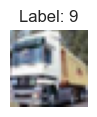

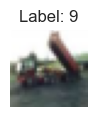

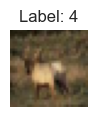

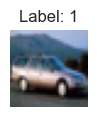

In [18]:
# Display a few images after CNN model development

for i in range(5):
    plt.figure(figsize=(1, 6))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()



Based on the aforementioned code, perform the following activity:


1.   Using the provided code, create one distinct CNN models with architectures different from the one provided.


2.  Train the model with three different optimizers selected from the options available at https://keras.io/api/optimizers/.

3.  Measure the time it takes to train each model with its respective optimizer by importing the 'time' module and recording the start and end times using 'time.time()'.

4. Include this bar plot in your lab logbook to compare training times with different optimizers.

5. Strive to fine-tune the model parameters to achieve higher accuracy, ideally surpassing 90%. Document in your lab logbook the highest accuracy you have achieved through this fine-tuning process.

In [19]:
# Your code to do the above activity.
# Hint - import time
#
import time

In [20]:
# Your code to do the above activity.
# Hint - Put name of optimizers 
#
#
optimizers = ['adadelta', 'adagrad', 'ftrl']

In [21]:
# Your code to do the above activity.
# Hint - Store training time and accuracy in lists
#
#

trainingTimes = []
accuracies = []

In [22]:
# Your code to do the above activity.
# Hint - import time and use time.time() just before and after training to record start and end time of the training. Difference will provide the training time.
#
#
#


In [23]:
# Your code to do the above activity.
# Hint - use loops for use different optimizers

for optimizer in optimizers:
    # Create a new CNN models with architectures different from the one provided
    print('\n', optimizer, 'optimizer')
    
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))

    model.add(Flatten())

    model.add(Dense(64, activation='relu')) # from 64 to 512
    model.add(Dense(10, activation='softmax'))

    
    
    # Compile the model with the current optimizer
    model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train, epochs =3, batch_size = 64,
             #validation_split = 0.2
              verbose = 1)
    end_time = time.time()
    
    
    training_time = end_time - start_time
    trainingTimes.append(training_time)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)
    #
    
    


 adadelta optimizer
Epoch 1/3
782/782 [==============================] - 54s 66ms/step - loss: 2.3018 - accuracy: 0.1034
Epoch 2/3
782/782 [==============================] - 51s 65ms/step - loss: 2.2983 - accuracy: 0.1277
Epoch 3/3
782/782 [==============================] - 49s 63ms/step - loss: 2.2945 - accuracy: 0.1495

 adagrad optimizer
Epoch 1/3
782/782 [==============================] - 50s 62ms/step - loss: 2.2883 - accuracy: 0.1461
Epoch 2/3
782/782 [==============================] - 48s 62ms/step - loss: 2.2101 - accuracy: 0.2087
Epoch 3/3
782/782 [==============================] - 48s 62ms/step - loss: 2.0630 - accuracy: 0.2583

 ftrl optimizer
Epoch 1/3
782/782 [==============================] - 60s 72ms/step - loss: 2.3026 - accuracy: 0.0955
Epoch 2/3
782/782 [==============================] - 55s 70ms/step - loss: 2.3026 - accuracy: 0.0991
Epoch 3/3
782/782 [==============================] - 72s 93ms/step - loss: 2.3026 - accuracy: 0.0995


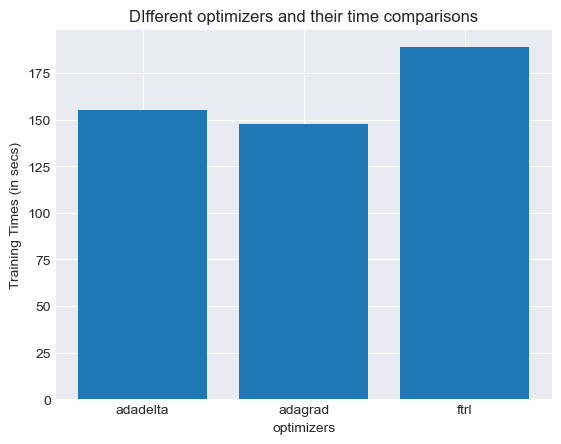

In [24]:
# Your code to do the above activity.
# Generate a bar plot to compare training times
#
plt.bar(optimizers, trainingTimes)
plt.xlabel('optimizers')
plt.ylabel('Training Times (in secs)')
plt.title('DIfferent optimizers and their time comparisons')
plt.show()


Lab Logbook Requirements:

1. Record the bar graph depicting the comparison of training times.
2. Record the final accuracy achieved.


In [25]:
# Print accuracies achieved with different optimizers

for i, optimizer in enumerate(optimizers):
    print(f"{optimizer} Optimizer - Test Accuracy: {accuracies[i] * 100:.2f}%")

adadelta Optimizer - Test Accuracy: 15.77%
adagrad Optimizer - Test Accuracy: 25.75%
ftrl Optimizer - Test Accuracy: 10.00%
